# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np

# Importing Dataset

In [2]:
domestic = pd.read_csv("Resume Challenge\\domestic_visitors\\domestic_visitors_2016.csv")

In [3]:
df_2017 = pd.read_csv("Resume Challenge\\domestic_visitors\\domestic_visitors_2017.csv")

In [4]:
df_2018 = pd.read_csv("Resume Challenge\\domestic_visitors\\domestic_visitors_2018.csv")

In [5]:
df_2019 = pd.read_csv("Resume Challenge\\domestic_visitors\\domestic_visitors_2019.csv")

In [6]:
foreign = pd.read_csv("Resume Challenge\\foreign_visitors\\foreign_visitors_2016.csv")

In [7]:
df_2017_f = pd.read_csv("Resume Challenge\\foreign_visitors\\foreign_visitors_2017.csv")

In [8]:
df_2018_f = pd.read_csv("Resume Challenge\\foreign_visitors\\foreign_visitors_2018.csv")

In [9]:
df_2019_f = pd.read_csv("Resume Challenge\\foreign_visitors\\foreign_visitors_2019.csv")

# Data Merging : Domestic

In [10]:
domestic.shape

(372, 5)

In [11]:
domestic = domestic.append(df_2017)

C:\Users\Revanth\AppData\Local\Temp\ipykernel_26696\298391023.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  domestic = domestic.append(df_2017)


In [12]:
domestic = domestic.append(df_2018)

C:\Users\Revanth\AppData\Local\Temp\ipykernel_26696\490789206.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  domestic = domestic.append(df_2018)


In [13]:
domestic = domestic.append(df_2019)

C:\Users\Revanth\AppData\Local\Temp\ipykernel_26696\3173857291.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  domestic = domestic.append(df_2019)


In [14]:
domestic

,district,date,month,year,visitors
0,Adilabad,01-01-2016,January,2016,792136
1,Adilabad,01-02-2016,February,2016,937820
2,Adilabad,01-03-2016,March,2016,582946
3,Adilabad,01-04-2016,April,2016,341948
4,Adilabad,01-05-2016,May,2016,252887
...,...,...,...,...,...
391,Yadadri Bhongir,01-08-2019,August,2019,389010
392,Yadadri Bhongir,01-09-2019,September,2019,366862
393,Yadadri Bhongir,01-10-2019,October,2019,381860
394,Yadadri Bhongir,01-11-2019,November,2019,365990


In [15]:
domestic.to_csv("domestic_visitors.csv")

# Data Merging : Foreign

In [16]:
foreign.shape

(372, 5)

In [17]:
foreign = foreign.append(df_2017_f)

C:\Users\Revanth\AppData\Local\Temp\ipykernel_26696\482806880.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  foreign = foreign.append(df_2017_f)


In [18]:
foreign = foreign.append(df_2018_f)

C:\Users\Revanth\AppData\Local\Temp\ipykernel_26696\2257769653.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  foreign = foreign.append(df_2018_f)


In [19]:
foreign = foreign.append(df_2019_f)

C:\Users\Revanth\AppData\Local\Temp\ipykernel_26696\1296917730.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  foreign = foreign.append(df_2019_f)


In [20]:
foreign.to_csv("foreign_visitors.csv")

# Data Cleaning : Domestic

In [21]:
domestic.isnull().sum()

district     0
date         0
month        0
year         0
visitors    30
dtype: int64

In [22]:
domestic.replace([" ",np.nan], 0, inplace=True)

In [23]:
domestic

,district,date,month,year,visitors
0,Adilabad,01-01-2016,January,2016,792136
1,Adilabad,01-02-2016,February,2016,937820
2,Adilabad,01-03-2016,March,2016,582946
3,Adilabad,01-04-2016,April,2016,341948
4,Adilabad,01-05-2016,May,2016,252887
...,...,...,...,...,...
391,Yadadri Bhongir,01-08-2019,August,2019,389010
392,Yadadri Bhongir,01-09-2019,September,2019,366862
393,Yadadri Bhongir,01-10-2019,October,2019,381860
394,Yadadri Bhongir,01-11-2019,November,2019,365990


In [24]:
domestic.dtypes

district    object
date        object
month       object
year         int64
visitors    object
dtype: object

In [25]:
domestic["visitors"] = domestic.visitors.astype("int64")

In [26]:
domestic = domestic.drop_duplicates()

In [27]:
domestic.shape

(1512, 5)

# Data Cleaning : Foreigners

In [28]:
foreign.isnull().sum()

district    0
date        0
month       0
year        0
visitors    0
dtype: int64

In [29]:
foreign["visitors"] = foreign["visitors"].replace(" ",0)

In [30]:
foreign["visitors"] = foreign["visitors"].astype("int64")

In [31]:
df = pd.DataFrame({"foreign":foreign.groupby("district")["visitors"].sum()})

In [32]:
df["domestic"]=domestic.groupby("district")["visitors"].sum()

In [33]:
df.isnull().sum()

foreign     0
domestic    1
dtype: int64

In [34]:
df["domestic"] = df["domestic"].replace(np.nan, 0)

In [35]:
domestic.to_csv("domestic_visitors.csv")

In [36]:
foreign.to_csv("foreign_visitors.csv")

In [37]:
domestic.shape

(1512, 5)

# #1 Top_10 Districts

In [38]:
combined = domestic.append(foreign)

C:\Users\Revanth\AppData\Local\Temp\ipykernel_26696\1235055477.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined = domestic.append(foreign)


In [39]:
domestic.shape

(1512, 5)

In [40]:
foreign.shape

(1512, 5)

In [41]:
combined.shape

(3024, 5)

In [42]:
combined.groupby("district")["visitors"].sum().sort_values(ascending=True).nlargest(10)

district
Hyderabad                   84945858
Rajanna Sircilla            41763276
Warangal (Urban)            30735424
Yadadri Bhongir             26893080
Bhadradri Kothagudem        21600962
Medak                       20542639
Jayashankar Bhoopalpally    19634117
Mahbubnagar                 17182400
Nirmal                      13315798
Jagtial                     11303514
Name: visitors, dtype: int64

In [43]:
combined.to_csv("combined.csv")

<AxesSubplot: title={'center': 'Top 10 Districts'}, ylabel='district'>

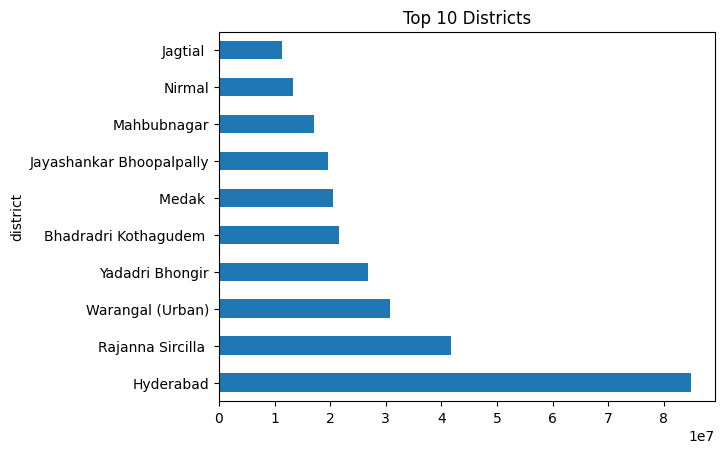

In [44]:
combined.groupby("district")["visitors"].sum().sort_values(ascending=True).nlargest(10).plot(kind="barh", title="Top 10 Districts")

# #1 Bottom_10 Districts

<AxesSubplot: title={'center': 'Bottom 10 Districts'}, ylabel='district'>

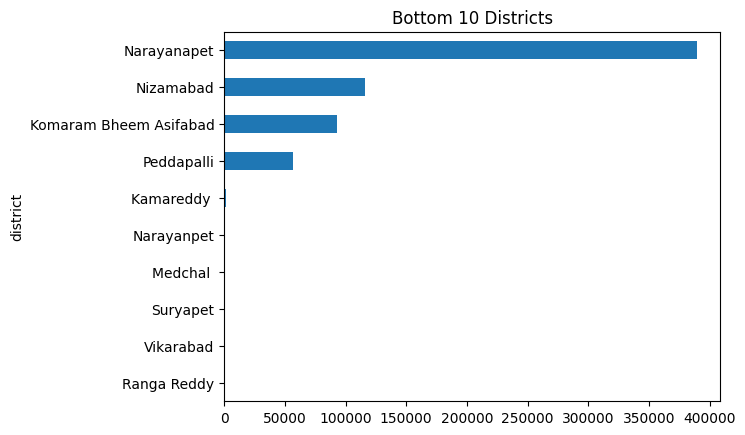

In [45]:
combined.groupby("district")["visitors"].sum().sort_values(ascending=True).nsmallest(10).plot(kind="barh", title="Bottom 10 Districts")

In [46]:
combined.groupby("district")["visitors"].sum().nsmallest(10)

district
Medchal                        0
Ranga Reddy                    0
Suryapet                       0
Vikarabad                      0
Narayanpet                     5
Kamareddy                   1773
Peddapalli                 56977
Komaram Bheem Asifabad     92734
Nizamabad                 116152
Narayanapet               389250
Name: visitors, dtype: int64

# #2 Domestic Top_3 CAGR 

In [47]:
pd.set_option("display.max_rows", None)

In [48]:
domestic.groupby(["year","district"])["visitors"].sum()

year  district                
2016  Adilabad                     5075557
      Bhadradri Kothagudem          889030
      Hyderabad                   23394705
      Jagtial                       623077
      Jangaon                        40660
      Jayashankar Bhoopalpally      243400
      Jogulamba Gadwal              523401
      Kamareddy                        127
      Karimnagar                   9167468
      Khammam                      5005031
      Komaram Bheem Asifabad             0
      Mahabubabad                   140002
      Mahbubnagar                  8304766
      Mancherial                      7802
      Medak                        3463200
      Medchal                            0
      Nagarkurnool                  588473
      Nalgonda                     5858461
      Nirmal                        916610
      Nizamabad                       6442
      Peddapalli                      3244
      Rajanna Sircilla             2176801
      Ranga Reddy      

In [49]:
districts=domestic["district"].unique()

In [50]:
districts

array(['Adilabad', 'Bhadradri Kothagudem ', 'Hyderabad', 'Jagtial ',
       'Jangaon ', 'Jayashankar Bhoopalpally', 'Jogulamba Gadwal ',
       'Kamareddy ', 'Karimnagar ', 'Khammam', 'Komaram Bheem Asifabad',
       'Mahabubabad ', 'Mahbubnagar', 'Mancherial', 'Medak ', 'Medchal ',
       'Nagarkurnool ', 'Nalgonda', 'Nirmal', 'Nizamabad', 'Peddapalli',
       'Rajanna Sircilla ', 'Ranga Reddy', 'Sangareddy ', 'Siddipet',
       'Suryapet', 'Vikarabad', 'Wanaparthy ', 'Warangal (Rural)',
       'Warangal (Urban)', 'Yadadri Bhongir', 'Mulugu', 'Narayanapet'],
      dtype=object)

In [51]:
dom = pd.DataFrame({"district":districts})

In [52]:
domo_2016=[]
for i in districts:
    domestic_2016 = domestic[domestic["year"]==2016]
    domo = domestic_2016[domestic_2016["district"]==i].visitors.sum()
    domo_2016.append(domo)
dom["2016"]=domo_2016

In [53]:
domo_2019=[]
for i in districts:
    domestic_2019 = domestic[domestic["year"]==2019]
    domo = domestic_2019[domestic_2019["district"]==i].visitors.sum()
    domo_2019.append(domo)
dom["2019"]=domo_2019

In [54]:
dom.head()

,district,2016,2019
0,Adilabad,5075557,775895
1,Bhadradri Kothagudem,889030,12817737
2,Hyderabad,23394705,13802362
3,Jagtial,623077,3086115
4,Jangaon,40660,328890


In [55]:
cagr=[]
for i in range(len(districts)):
    fv = dom.loc[i,"2019"]
    iv = dom.loc[i,"2016"]
    cagrr = (((fv/iv)**(1/3))-1)
    cagr.append(cagrr)

C:\Users\Revanth\AppData\Local\Temp\ipykernel_26696\2819281081.py:5: RuntimeWarning: divide by zero encountered in longlong_scalars
  cagrr = (((fv/iv)**(1/3))-1)
C:\Users\Revanth\AppData\Local\Temp\ipykernel_26696\2819281081.py:5: RuntimeWarning: invalid value encountered in longlong_scalars
  cagrr = (((fv/iv)**(1/3))-1)


In [56]:
dom["CAGR"]=cagr

In [57]:
dom = dom.replace([np.inf,np.nan],0)

In [58]:
dom.head()

,district,2016,2019,CAGR
0,Adilabad,5075557,775895,-0.465305
1,Bhadradri Kothagudem,889030,12817737,1.433875
2,Hyderabad,23394705,13802362,-0.161290
3,Jagtial,623077,3086115,0.704604
4,Jangaon,40660,328890,1.007372


In [59]:
dom_max = dom.sort_values(by="CAGR", ascending=False).head(3)
dom_max = dom_max.reset_index()
dom_max.drop("index", axis=1, inplace=True)

<AxesSubplot: xlabel='district'>

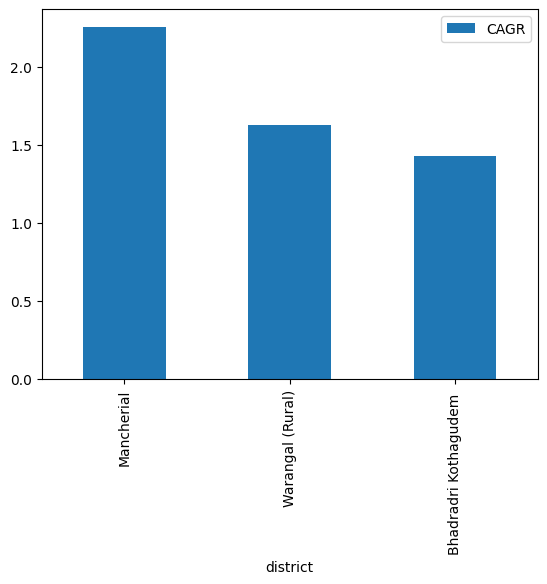

In [60]:
dom_max.head().plot("district", "CAGR", kind="bar")

# #3 Domestic Bottom_3 CAGR 

In [61]:
dom_min = dom.sort_values(by="CAGR", ascending=True).head(3)
dom_min = dom_min.reset_index()
dom_min.drop("index", axis=1, inplace=True)

<AxesSubplot: xlabel='district'>

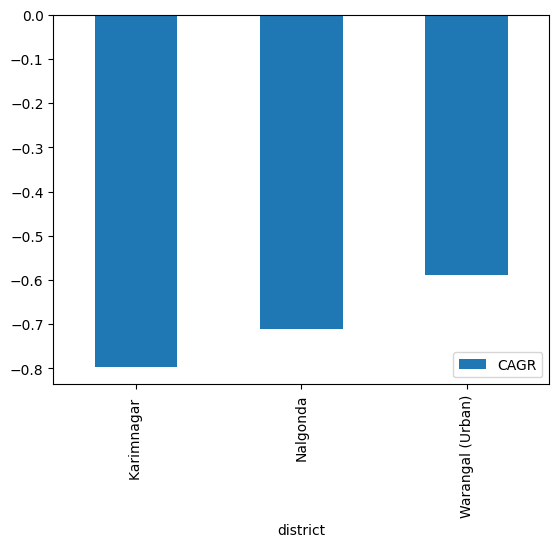

In [62]:
dom_min.head().plot("district", "CAGR", kind="bar")

In [63]:
dom.to_csv("cagr.csv")

# #2 Foreign Top_3 CAGR

In [64]:
foreign.groupby(["year","district"])["visitors"].sum()

year  district                
2016  Adilabad                        10
      Bhadradri Kothagudem             0
      Hyderabad                   163631
      Jagtial                          0
      Jangaon                          2
      Jayashankar Bhoopalpally        86
      Jogulamba Gadwal                45
      Kamareddy                        0
      Karimnagar                       0
      Khammam                          0
      Komaram Bheem Asifabad           0
      Mahabubabad                      0
      Mahbubnagar                    868
      Mancherial                       0
      Medak                            0
      Medchal                          0
      Nagarkurnool                    29
      Nalgonda                         0
      Nirmal                           0
      Nizamabad                        0
      Peddapalli                       0
      Rajanna Sircilla                 0
      Ranga Reddy                      0
      Sangareddy          

In [65]:
frgn = pd.DataFrame({"district":districts})

In [66]:
domo_2016=[]
for i in districts:
    domestic_2016 = foreign[foreign["year"]==2016]
    domo = domestic_2016[domestic_2016["district"]==i].visitors.sum()
    domo_2016.append(domo)
frgn["2016"]=domo_2016

In [67]:
domo_2019=[]
for i in districts:
    domestic_2019 = foreign[foreign["year"]==2019]
    domo = domestic_2019[domestic_2019["district"]==i].visitors.sum()
    domo_2019.append(domo)
frgn["2019"]=domo_2019

In [68]:
frgn.head()

,district,2016,2019
0,Adilabad,10,6
1,Bhadradri Kothagudem,0,0
2,Hyderabad,163631,319300
3,Jagtial,0,0
4,Jangaon,2,0


In [69]:
cagr=[]
for i in range(len(districts)):
    fv = frgn.loc[i,"2019"]
    iv = frgn.loc[i,"2016"]
    cagrr = (((fv/iv)**(1/3))-1)
    cagr.append(cagrr)

C:\Users\Revanth\AppData\Local\Temp\ipykernel_26696\3040827289.py:5: RuntimeWarning: invalid value encountered in longlong_scalars
  cagrr = (((fv/iv)**(1/3))-1)
C:\Users\Revanth\AppData\Local\Temp\ipykernel_26696\3040827289.py:5: RuntimeWarning: divide by zero encountered in longlong_scalars
  cagrr = (((fv/iv)**(1/3))-1)


In [70]:
frgn["CAGR"]=cagr

In [71]:
frgn.head()

,district,2016,2019,CAGR
0,Adilabad,10,6,-0.156567
1,Bhadradri Kothagudem,0,0,NaN
2,Hyderabad,163631,319300,0.249619
3,Jagtial,0,0,NaN
4,Jangaon,2,0,-1.000000


In [72]:
frgn = frgn.replace([np.inf,np.nan],0)

In [73]:
frgn.head()

,district,2016,2019,CAGR
0,Adilabad,10,6,-0.156567
1,Bhadradri Kothagudem,0,0,0.000000
2,Hyderabad,163631,319300,0.249619
3,Jagtial,0,0,0.000000
4,Jangaon,2,0,-1.000000


In [74]:
frgn.sort_values(by="CAGR", ascending=False)

,district,2016,2019,CAGR
16,Nagarkurnool,29,199,0.900283
6,Jogulamba Gadwal,45,295,0.871557
2,Hyderabad,163631,319300,0.249619
29,Warangal (Urban),1899,2450,0.088630
25,Suryapet,0,0,0.000000
20,Peddapalli,0,0,0.000000
21,Rajanna Sircilla,0,0,0.000000
22,Ranga Reddy,0,0,0.000000
23,Sangareddy,0,0,0.000000
24,Siddipet,0,0,0.000000


In [75]:
frgn_max = frgn.sort_values(by="CAGR", ascending=False).head(3)
frgn_max = frgn_max.reset_index()
frgn_max.drop("index", axis=1, inplace=True)

In [76]:
frgn_max

,district,2016,2019,CAGR
0,Nagarkurnool,29,199,0.900283
1,Jogulamba Gadwal,45,295,0.871557
2,Hyderabad,163631,319300,0.249619


<AxesSubplot: xlabel='district'>

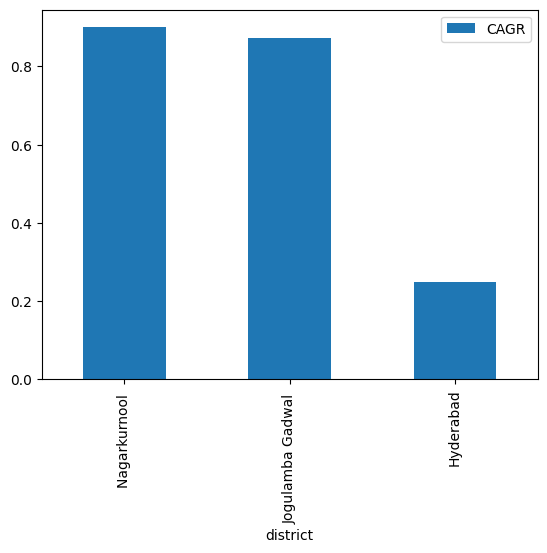

In [77]:
frgn_max.head().plot("district", "CAGR", kind="bar")

# #3 Foreign Bottom_3 CAGR

In [78]:
frgn_min = frgn.sort_values(by="CAGR", ascending=True).head(3)
frgn_min = frgn_min.reset_index()
frgn_min.drop("index", axis=1, inplace=True)

<AxesSubplot: xlabel='district'>

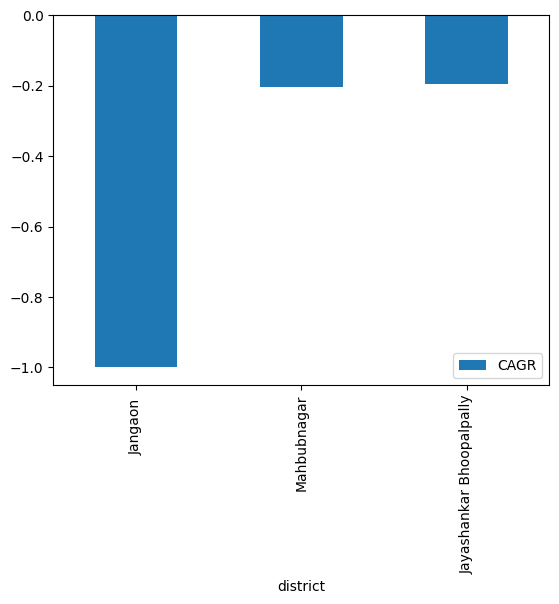

In [79]:
frgn_min.head().plot("district", "CAGR", kind="bar")

In [80]:
frgn.to_csv("foreign_cagr.csv")

# #4 Peak Months

In [81]:
dom_hyd = domestic[domestic["district"]=="Hyderabad"]

In [82]:
dom_hyd.groupby("month")["visitors"].sum().sort_values(ascending=False).head()

month
June        16897783
December     9338637
October      6552397
January      6452101
April        6126839
Name: visitors, dtype: int64

<AxesSubplot: xlabel='month'>

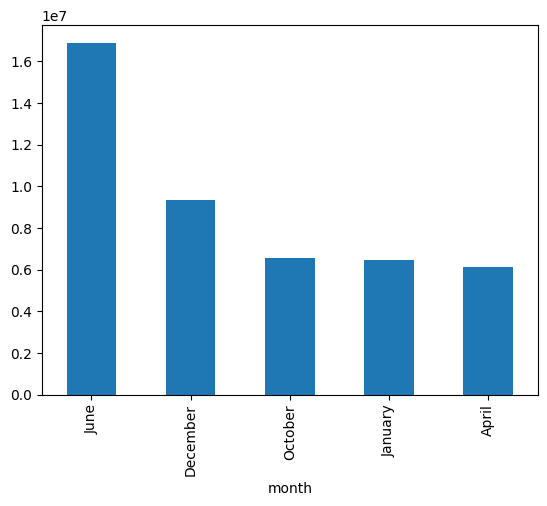

In [83]:
dom_hyd.groupby("month")["visitors"].sum().sort_values(ascending=False).head().plot(kind="bar")

In [84]:
dom_hyd.groupby("month")["visitors"].sum().sort_values(ascending=False).tail()

month
November     5626156
July         5552527
September    5312283
March        5227626
February     5014430
Name: visitors, dtype: int64

<AxesSubplot: xlabel='month'>

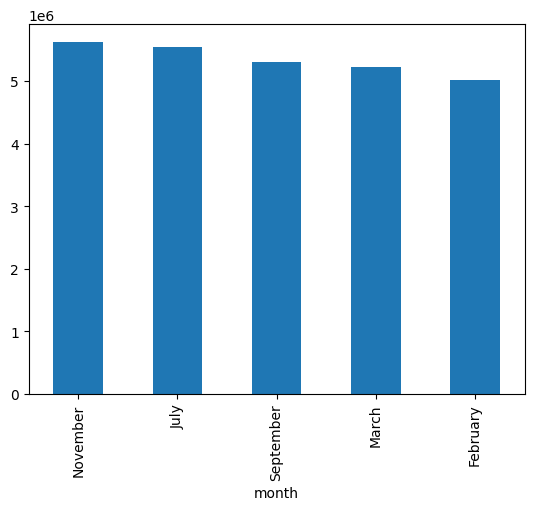

In [85]:
dom_hyd.groupby("month")["visitors"].sum().sort_values(ascending=False).tail().plot(kind="bar")

# #5 D/F Ratio

In [86]:
df

,foreign,domestic
district,,
Adilabad,32,7321575.0
Bhadradri Kothagudem,0,21600962.0
Hyderabad,1044898,83900960.0
Jagtial,0,11303514.0
Jangaon,2,826280.0
Jayashankar Bhoopalpally,1252,19632865.0
Jogulamba Gadwal,945,6813340.0
Kamareddy,0,1773.0
Karimnagar,0,9462383.0


In [87]:
ratios = []
for i in range(33):
    ratio = df.iloc[i,1]/df.iloc[i,0]
    ratios.append(ratio)
df["Ratio"]=ratios

C:\Users\Revanth\AppData\Local\Temp\ipykernel_26696\1637206168.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = df.iloc[i,1]/df.iloc[i,0]
C:\Users\Revanth\AppData\Local\Temp\ipykernel_26696\1637206168.py:3: RuntimeWarning: invalid value encountered in double_scalars
  ratio = df.iloc[i,1]/df.iloc[i,0]


In [88]:
df

,foreign,domestic,Ratio
district,,,
Adilabad,32,7321575.0,2.287992e+05
Bhadradri Kothagudem,0,21600962.0,inf
Hyderabad,1044898,83900960.0,8.029584e+01
Jagtial,0,11303514.0,inf
Jangaon,2,826280.0,4.131400e+05
Jayashankar Bhoopalpally,1252,19632865.0,1.568120e+04
Jogulamba Gadwal,945,6813340.0,7.209884e+03
Kamareddy,0,1773.0,inf
Karimnagar,0,9462383.0,inf


In [89]:
df = df.replace([np.nan, np.inf], 0)

In [90]:
df_ratio = df.sort_values(by="Ratio", ascending=False).where(df["foreign"]>100)

In [91]:
df_ratio

,foreign,domestic,Ratio
district,,,
Nirmal,NaN,NaN,NaN
Jangaon,NaN,NaN,NaN
Adilabad,NaN,NaN,NaN
Mancherial,NaN,NaN,NaN
Nizamabad,NaN,NaN,NaN
Jayashankar Bhoopalpally,1252.0,19632865.0,15681.202077
Nagarkurnool,761.0,7424355.0,9756.051248
Mahbubnagar,2282.0,17180118.0,7528.535495
Jogulamba Gadwal,945.0,6813340.0,7209.883598


In [92]:
df_ratio = df_ratio.dropna()

In [93]:
df_ratio.sort_values(by="Ratio", ascending=True, inplace=True)

C:\Users\Revanth\AppData\Local\Temp\ipykernel_26696\3006729634.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ratio.sort_values(by="Ratio", ascending=True, inplace=True)


In [94]:
df_ratio = df_ratio.reset_index()

In [95]:
df_ratio.head()

,district,foreign,domestic,Ratio
0,Hyderabad,1044898.0,83900960.0,80.295837
1,Warangal (Rural),306.0,819162.0,2677.000000
2,Mulugu,575.0,1819800.0,3164.869565
3,Warangal (Urban),8821.0,30726603.0,3483.346899
4,Jogulamba Gadwal,945.0,6813340.0,7209.883598


<AxesSubplot: xlabel='district'>

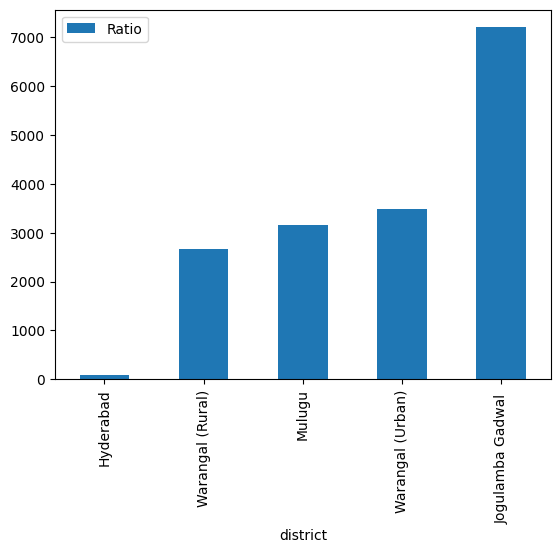

In [96]:
df_ratio.head().plot("district", "Ratio", kind="bar")

In [97]:
df_ratio.tail().sort_values(by="Ratio", ascending=False, inplace=True)

C:\Users\Revanth\AppData\Local\Temp\ipykernel_26696\2971362504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ratio.tail().sort_values(by="Ratio", ascending=False, inplace=True)


In [98]:
df_ratio.tail()

,district,foreign,domestic,Ratio
3,Warangal (Urban),8821.0,30726603.0,3483.346899
4,Jogulamba Gadwal,945.0,6813340.0,7209.883598
5,Mahbubnagar,2282.0,17180118.0,7528.535495
6,Nagarkurnool,761.0,7424355.0,9756.051248
7,Jayashankar Bhoopalpally,1252.0,19632865.0,15681.202077


<AxesSubplot: xlabel='district'>

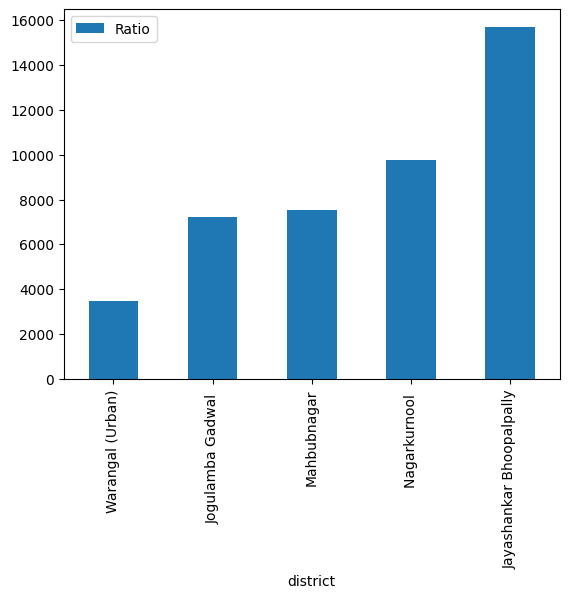

In [99]:
df_ratio.tail().plot("district", "Ratio", kind="bar")

In [100]:
df_ratio.to_csv("df_ratio.csv")

In [101]:
df_ratio.shape

(8, 4)

# #6 Population to Tourist Ratio

In [102]:
dff = pd.read_csv("pop.csv")

In [103]:
dff.head()

,S.No.,District Name,As per 2011 census,Estimated Population in 2023,2019,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,1,Adilabad,708972,768667,748769,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Bhadradri Kothagudem,1069261,1159293,1129283,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Hyderabad,3943323,4275351,4164675,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Jagitial,985417,1068389,1040732,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Jangaon,566376,614065,598169,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
dff = dff.dropna(axis=1)

In [105]:
dff.drop("S.No.", axis=1, inplace=True)

In [106]:
dff

,District Name,As per 2011 census,Estimated Population in 2023,2019
0,Adilabad,708972,768667,748769
1,Bhadradri Kothagudem,1069261,1159293,1129283
2,Hyderabad,3943323,4275351,4164675
3,Jagitial,985417,1068389,1040732
4,Jangaon,566376,614065,598169
5,Jayashankar Bhupalpally,416763,451854,440157
6,Jogulamba Gadwal,609990,661351,644231
7,Kamareddy,972625,1054520,1027222
8,Karimnagar,1005711,1090392,1062165
9,Khammam,1401639,1519657,1480318


In [107]:
dff.sort_values(by="District Name", inplace=True)

In [108]:
dff

,District Name,As per 2011 census,Estimated Population in 2023,2019
0,Adilabad,708972,768667,748769
1,Bhadradri Kothagudem,1069261,1159293,1129283
2,Hyderabad,3943323,4275351,4164675
3,Jagitial,985417,1068389,1040732
4,Jangaon,566376,614065,598169
5,Jayashankar Bhupalpally,416763,451854,440157
6,Jogulamba Gadwal,609990,661351,644231
7,Kamareddy,972625,1054520,1027222
8,Karimnagar,1005711,1090392,1062165
9,Khammam,1401639,1519657,1480318


In [109]:
dom

,district,2016,2019,CAGR
0,Adilabad,5075557,775895,-0.465305
1,Bhadradri Kothagudem,889030,12817737,1.433875
2,Hyderabad,23394705,13802362,-0.161290
3,Jagtial,623077,3086115,0.704604
4,Jangaon,40660,328890,1.007372
5,Jayashankar Bhoopalpally,243400,662530,0.396245
6,Jogulamba Gadwal,523401,2007995,0.565463
7,Kamareddy,127,534,0.614033
8,Karimnagar,9167468,77491,-0.796296
9,Khammam,5005031,1413440,-0.343920


In [110]:
dom = dom.sort_values(by="district")

In [111]:
dom.reset_index(inplace=True)
dom.drop("index", axis=1, inplace=True)

In [112]:
dff["dom_visitors"] = dom["2019"]

In [113]:
dff

,District Name,As per 2011 census,Estimated Population in 2023,2019,dom_visitors
0,Adilabad,708972,768667,748769,775895
1,Bhadradri Kothagudem,1069261,1159293,1129283,12817737
2,Hyderabad,3943323,4275351,4164675,13802362
3,Jagitial,985417,1068389,1040732,3086115
4,Jangaon,566376,614065,598169,328890
5,Jayashankar Bhupalpally,416763,451854,440157,662530
6,Jogulamba Gadwal,609990,661351,644231,2007995
7,Kamareddy,972625,1054520,1027222,534
8,Karimnagar,1005711,1090392,1062165,77491
9,Khammam,1401639,1519657,1480318,1413440


In [114]:
foreign_1 = pd.DataFrame({"district":districts})

In [115]:
foreign.groupby(["year","district"])["visitors"].sum()

year  district                
2016  Adilabad                        10
      Bhadradri Kothagudem             0
      Hyderabad                   163631
      Jagtial                          0
      Jangaon                          2
      Jayashankar Bhoopalpally        86
      Jogulamba Gadwal                45
      Kamareddy                        0
      Karimnagar                       0
      Khammam                          0
      Komaram Bheem Asifabad           0
      Mahabubabad                      0
      Mahbubnagar                    868
      Mancherial                       0
      Medak                            0
      Medchal                          0
      Nagarkurnool                    29
      Nalgonda                         0
      Nirmal                           0
      Nizamabad                        0
      Peddapalli                       0
      Rajanna Sircilla                 0
      Ranga Reddy                      0
      Sangareddy          

In [116]:
for_2016=[]
for i in districts:
    foreign_2016 = foreign[foreign["year"]==2016]
    fore = foreign_2016[foreign_2016["district"]==i].visitors.sum()
    for_2016.append(fore)
foreign_1["2016"]=for_2016

In [117]:
for_2019=[]
for i in districts:
    foreign_2019 = foreign[foreign["year"]==2019]
    fore = foreign_2019[foreign_2019["district"]==i].visitors.sum()
    for_2019.append(fore)
foreign_1["2019"]=for_2019

In [118]:
foreign_1.head()

,district,2016,2019
0,Adilabad,10,6
1,Bhadradri Kothagudem,0,0
2,Hyderabad,163631,319300
3,Jagtial,0,0
4,Jangaon,2,0


In [119]:
foreign_1 = foreign_1.sort_values(by="district")

In [120]:
foreign_1 = foreign_1.reset_index()
foreign_1.drop("index", axis=1, inplace=True)

In [121]:
dff["for_visitors"] = foreign_1["2019"]

In [122]:
dff

,District Name,As per 2011 census,Estimated Population in 2023,2019,dom_visitors,for_visitors
0,Adilabad,708972,768667,748769,775895,6
1,Bhadradri Kothagudem,1069261,1159293,1129283,12817737,0
2,Hyderabad,3943323,4275351,4164675,13802362,319300
3,Jagitial,985417,1068389,1040732,3086115,0
4,Jangaon,566376,614065,598169,328890,0
5,Jayashankar Bhupalpally,416763,451854,440157,662530,45
6,Jogulamba Gadwal,609990,661351,644231,2007995,295
7,Kamareddy,972625,1054520,1027222,534,0
8,Karimnagar,1005711,1090392,1062165,77491,0
9,Khammam,1401639,1519657,1480318,1413440,0


In [123]:
dff.head()

,District Name,As per 2011 census,Estimated Population in 2023,2019,dom_visitors,for_visitors
0,Adilabad,708972,768667,748769,775895,6
1,Bhadradri Kothagudem,1069261,1159293,1129283,12817737,0
2,Hyderabad,3943323,4275351,4164675,13802362,319300
3,Jagitial,985417,1068389,1040732,3086115,0
4,Jangaon,566376,614065,598169,328890,0


In [124]:
total=[]
for i in range(len(dff)):
    sum = dff.iloc[i,4] + dff.iloc[i,5]
    total.append(sum)

In [125]:
dff["Total_Visitors"] = total

In [126]:
dff.head()

,District Name,As per 2011 census,Estimated Population in 2023,2019,dom_visitors,for_visitors,Total_Visitors
0,Adilabad,708972,768667,748769,775895,6,775901
1,Bhadradri Kothagudem,1069261,1159293,1129283,12817737,0,12817737
2,Hyderabad,3943323,4275351,4164675,13802362,319300,14121662
3,Jagitial,985417,1068389,1040732,3086115,0,3086115
4,Jangaon,566376,614065,598169,328890,0,328890


In [127]:
dff.iloc[1,3]

1129283

In [128]:
vp_ratio = []
for i in range(len(df)):
    r = dff.iloc[i,6]/dff.iloc[i,3]
    vp_ratio.append(r)

In [129]:
dff["VP Ratio"] = vp_ratio

In [130]:
dff["VP Ratio"] = dff["VP Ratio"].round(decimals=2)

In [131]:
dff.head()

,District Name,As per 2011 census,Estimated Population in 2023,2019,dom_visitors,for_visitors,Total_Visitors,VP Ratio
0,Adilabad,708972,768667,748769,775895,6,775901,1.04
1,Bhadradri Kothagudem,1069261,1159293,1129283,12817737,0,12817737,11.35
2,Hyderabad,3943323,4275351,4164675,13802362,319300,14121662,3.39
3,Jagitial,985417,1068389,1040732,3086115,0,3086115,2.97
4,Jangaon,566376,614065,598169,328890,0,328890,0.55


In [132]:
dff.to_csv("VP_Ratio.csv")

In [133]:
dff.sort_values(by="VP Ratio", ascending=False, inplace=True)

In [134]:
dff.head()

,District Name,As per 2011 census,Estimated Population in 2023,2019,dom_visitors,for_visitors,Total_Visitors,VP Ratio
23,Rajanna Sircilla,552037,598519,583025,16832897,0,16832897,28.87
1,Bhadradri Kothagudem,1069261,1159293,1129283,12817737,0,12817737,11.35
14,Medak,767428,832045,810506,5452570,0,5452570,6.73
16,Mulugu,257744,279446,272212,1819800,575,1820375,6.69
32,Yadadri Bhuvanagiri,739448,801710,780956,4489374,0,4489374,5.75


<AxesSubplot: xlabel='District Name'>

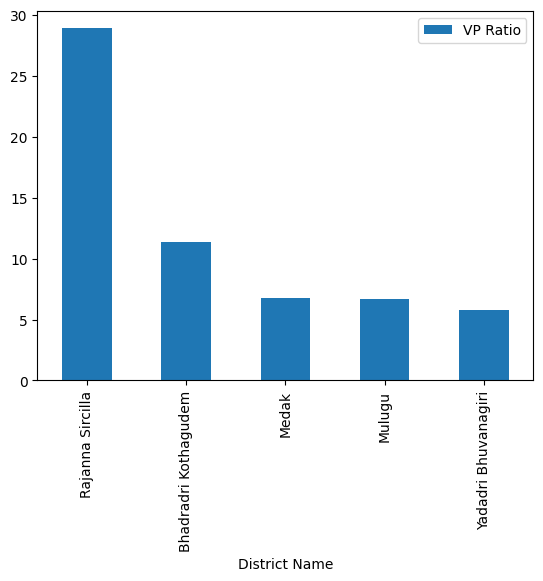

In [135]:
dff.head().plot("District Name","VP Ratio", kind="bar")

In [136]:
dff.tail()

,District Name,As per 2011 census,Estimated Population in 2023,2019,dom_visitors,for_visitors,Total_Visitors,VP Ratio
7,Kamareddy,972625,1054520,1027222,534,0,534,0.0
15,Medchal–Malkajgiri,2440073,2645527,2577043,0,0,0,0.0
28,Vikarabad,927140,1005205,979184,0,0,0,0.0
27,Suryapet,1099560,1192143,1161282,0,0,0,0.0
24,Ranga Reddy,2446265,2652241,2583583,0,0,0,0.0


<AxesSubplot: xlabel='District Name'>

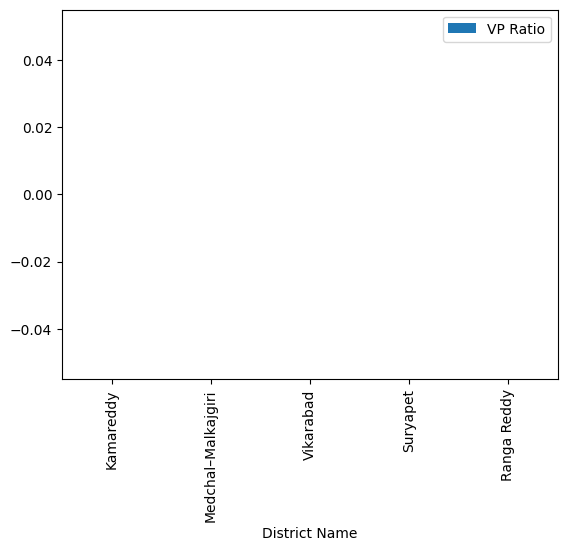

In [137]:
dff.tail().plot("District Name","VP Ratio", kind="bar")